<a href="https://colab.research.google.com/github/Shubh23104/Black_Friday/blob/main/Black_Friday_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## ***Problem Statement***

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [ ]:
df_train.shape

(180693, 12)

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1.0,1.0,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0.0,3.0,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1.0,5.0,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1.0,4.0,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0.0,4.0,5.0,12.0


In [ ]:
df_test.shape

(229681, 11)

In [ ]:
# merge Both train and test data
df = pd.concat([df_train,df_test],axis=0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
df.shape

(410374, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410374 entries, 0 to 229680
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     410374 non-null  int64  
 1   Product_ID                  410374 non-null  object 
 2   Gender                      410374 non-null  object 
 3   Age                         410374 non-null  object 
 4   Occupation                  410374 non-null  int64  
 5   City_Category               410373 non-null  object 
 6   Stay_In_Current_City_Years  410373 non-null  object 
 7   Marital_Status              410373 non-null  float64
 8   Product_Category_1          410372 non-null  float64
 9   Product_Category_2          283071 non-null  float64
 10  Product_Category_3          125080 non-null  float64
 11  Purchase                    180692 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 40.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.103740e+05,410374.000000,410373.000000,410372.000000,283071.000000,125080.000000,180692.000000
mean,1.002962e+06,8.087586,0.409359,5.285251,9.851256,12.664415,9313.820202
std,1.715391e+03,6.521910,0.491716,3.739252,5.092364,4.123193,4979.240857
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001466e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5855.000000
50%,1.002979e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8057.000000
75%,1.004386e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
# User_id is drop beacuse it does not require and can not influence the dependent variable
df = df.drop(['User_ID'],axis=1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
# Handling the Categorical Variable using one hot encoding
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)
df['Gender'] = np.where(df['Gender'],1,0)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
# The Another Way to handle categorical Variable
# df['Gender'] = np.where(df['Gender'] == 'M',1,0)
# df.head()

In [ ]:
# handle Categorical Varible of Age
age = df['Age'].unique().tolist()
age

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

In [ ]:
d = {'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7}
d

{'0-17': 1,
 '18-25': 2,
 '26-35': 3,
 '36-45': 4,
 '46-50': 5,
 '51-55': 6,
 '55+': 7}

In [ ]:
df['Age'] = df['Age'].map(d)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410374 entries, 0 to 229680
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  410374 non-null  object 
 1   Gender                      410374 non-null  int64  
 2   Age                         410374 non-null  int64  
 3   Occupation                  410374 non-null  int64  
 4   City_Category               410373 non-null  object 
 5   Stay_In_Current_City_Years  410373 non-null  object 
 6   Marital_Status              410373 non-null  float64
 7   Product_Category_1          410372 non-null  float64
 8   Product_Category_2          283071 non-null  float64
 9   Product_Category_3          125080 non-null  float64
 10  Purchase                    180692 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 37.6+ MB


In [ ]:
# handling City Category variable
df['City_Category'].unique()

array(['A', 'C', 'B', nan], dtype=object)

In [ ]:
df['City_Category'].isnull().sum()

1

In [ ]:
df.loc[df['City_Category'].isnull()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
229680,P00297742,1,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset=['City_Category'])

In [ ]:
df.loc[df['City_Category'].isnull()]

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410373 entries, 0 to 229679
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  410373 non-null  object 
 1   Gender                      410373 non-null  int64  
 2   Age                         410373 non-null  int64  
 3   Occupation                  410373 non-null  int64  
 4   City_Category               410373 non-null  object 
 5   Stay_In_Current_City_Years  410373 non-null  object 
 6   Marital_Status              410373 non-null  float64
 7   Product_Category_1          410372 non-null  float64
 8   Product_Category_2          283071 non-null  float64
 9   Product_Category_3          125080 non-null  float64
 10  Purchase                    180692 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 37.6+ MB


In [ ]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
229675,True,False
229676,False,True
229677,False,True
229678,False,True


In [ ]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0.0,3.0,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0.0,1.0,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0.0,12.0,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0.0,12.0,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0.0,8.0,NaN,NaN,7969.0,False,True


In [ ]:
df['B'] = np.where(df['B'],1,0)
df['C'] = np.where(df['C'],1,0)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [ ]:
# drop City Category Feature
df = df.drop('City_Category',axis=1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410373 entries, 0 to 229679
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  410373 non-null  object 
 1   Gender                      410373 non-null  int64  
 2   Age                         410373 non-null  int64  
 3   Occupation                  410373 non-null  int64  
 4   Stay_In_Current_City_Years  410373 non-null  object 
 5   Marital_Status              410373 non-null  float64
 6   Product_Category_1          410372 non-null  float64
 7   Product_Category_2          283071 non-null  float64
 8   Product_Category_3          125080 non-null  float64
 9   Purchase                    180692 non-null  float64
 10  B                           410373 non-null  int64  
 11  C                           410373 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 40.7+ MB


In [ ]:
# missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 1
Product_Category_2            127302
Product_Category_3            285293
Purchase                      229681
B                                  0
C                                  0
dtype: int64

In [ ]:
# Focus on replacing missing values
df['Product_Category_1'].unique()   # This is discrete Feature

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [ ]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     47793
14.0    41599
2.0     37132
16.0    32599
15.0    28398
5.0     19448
4.0     19416
6.0     12388
11.0    10650
17.0    10103
13.0     7927
9.0      4377
12.0     4145
10.0     2335
3.0      2177
18.0     2161
7.0       423
Name: count, dtype: int64

In [ ]:
df['Product_Category_1'].value_counts()

Product_Category_1
5.0     113952
1.0     105607
8.0      85432
11.0     18107
2.0      17987
6.0      15342
3.0      15166
4.0       8817
16.0      7234
15.0      4723
13.0      4157
10.0      3892
12.0      2941
7.0       2827
18.0      2313
14.0      1135
17.0       414
9.0        326
Name: count, dtype: int64

***if any Categorical Variable or Discrete feature the best way to filling missing values using the mode technique***

In [ ]:
# replace missing values in Product_Category_1 using mode technique
df['Product_Category_1'] = df['Product_Category_1'].fillna(df['Product_Category_1'].mode()[0])

In [ ]:
df['Product_Category_1'].isnull().sum()

0

In [ ]:
# replace missing values in Product_Category_2 using mode technique
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
# replace missing values in Product_Category_3 using mode technique
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df['Product_Category_3'].isnull().sum()

0

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0.0,8.0,8.0,16.0,7969.0,0,1


In [ ]:
df.shape

(410373, 12)

In [ ]:
# handling Stay_In_Current_City_Years Category
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].str.replace('+','')

0         2
1         2
2         2
3         2
4         4
         ..
229675    0
229676    2
229677    1
229678    1
229679    1
Name: Stay_In_Current_City_Years, Length: 410373, dtype: object

In [ ]:
d = {'0':0, '1':1, '2':2, '3':3, '4+':4}
d

{'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(d)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410373 entries, 0 to 229679
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  410373 non-null  object 
 1   Gender                      410373 non-null  int64  
 2   Age                         410373 non-null  int64  
 3   Occupation                  410373 non-null  int64  
 4   Stay_In_Current_City_Years  410373 non-null  int64  
 5   Marital_Status              410373 non-null  float64
 6   Product_Category_1          410373 non-null  float64
 7   Product_Category_2          410373 non-null  float64
 8   Product_Category_3          410373 non-null  float64
 9   Purchase                    180692 non-null  float64
 10  B                           410373 non-null  int64  
 11  C                           410373 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 40.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

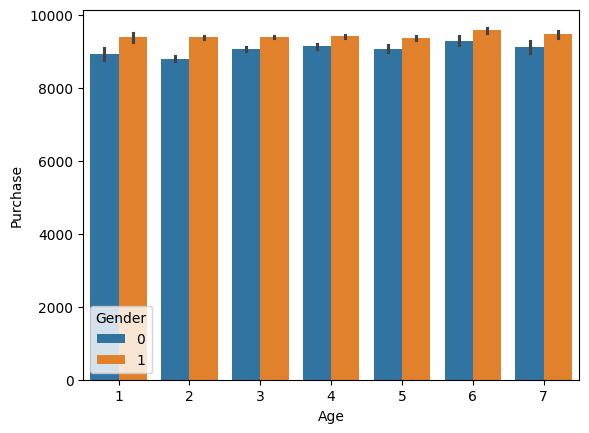

In [ ]:
# Visualization of Age vs Purchase
sns.barplot(x='Age', y='Purchase', hue='Gender',data=df)

Conclusion:
1. All age are equally Purchase the product
2. but purchasing of Male is high then Feamle

<Axes: xlabel='Occupation', ylabel='Purchase'>

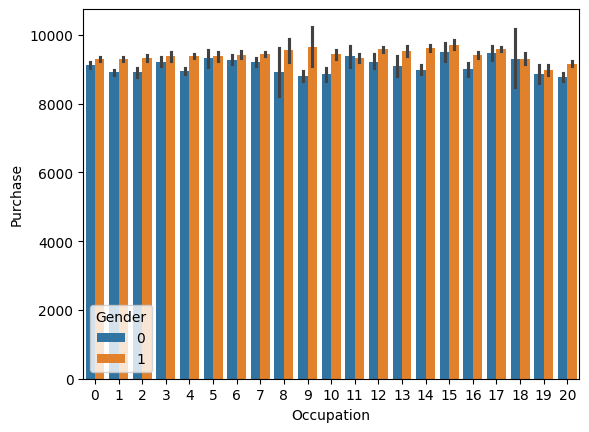

In [ ]:
# Visualization Purchase with occupation
sns.barplot(x='Occupation', y='Purchase', hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

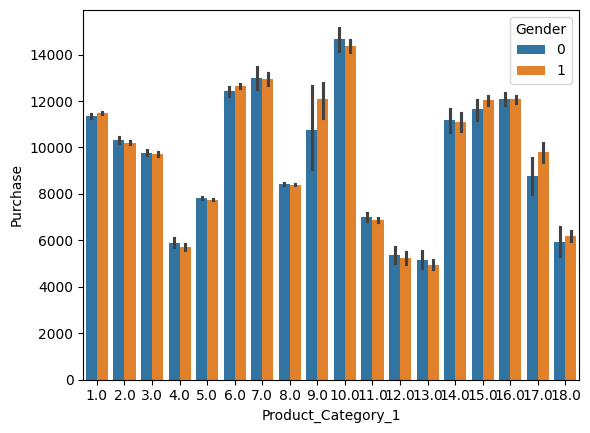

In [ ]:
# Visualization Product_Category_1 with Purchase
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

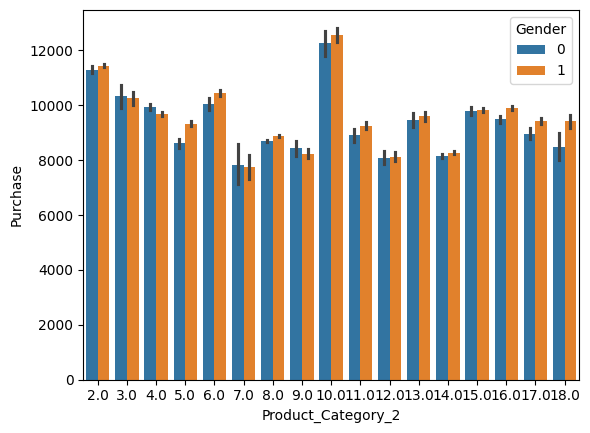

In [ ]:
# Visualization Product_Category_2 with Purchase
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

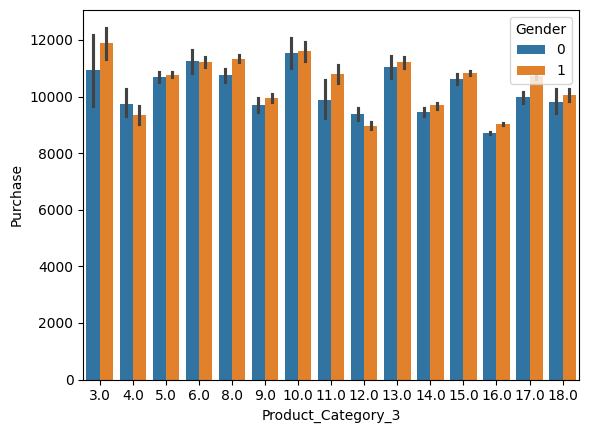

In [ ]:
# Visualization Product_Category_3 with Purchase
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender',data=df)

## ***Feature Scaling***

In [ ]:
df = df.drop(['Product_ID'],axis=1)

In [ ]:
df['Purchase'].isnull().sum()

229681

In [ ]:
df_test = df[df['Purchase'].isnull()]
df_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
180692,1,4,0,2,0.0,5.0,8.0,16.0,NaN,1,0
0,1,5,7,2,1.0,1.0,11.0,16.0,NaN,1,0
1,1,3,17,0,0.0,3.0,5.0,16.0,NaN,0,1
2,0,4,1,4,1.0,5.0,14.0,16.0,NaN,1,0
3,0,4,1,4,1.0,4.0,9.0,16.0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...
229675,1,4,0,0,1.0,1.0,8.0,16.0,NaN,1,0
229676,0,4,0,2,0.0,11.0,16.0,16.0,NaN,0,1
229677,1,2,0,1,0.0,7.0,8.0,16.0,NaN,0,1
229678,1,3,1,1,1.0,18.0,8.0,16.0,NaN,0,1


In [ ]:
df_train = df[~df['Purchase'].isnull()]

In [ ]:
df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,1,7,16,4,0.0,8.0,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
180687,0,4,0,0,1.0,8.0,14.0,16.0,8048.0,0,1
180688,0,4,0,0,1.0,8.0,14.0,16.0,7959.0,0,1
180689,1,4,0,2,0.0,1.0,8.0,17.0,15917.0,1,0
180690,1,4,0,2,0.0,2.0,8.0,18.0,13328.0,1,0


In [ ]:
df_train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [ ]:
X = df_train.drop('Purchase',axis=1)

In [ ]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0.0,3.0,8.0,16.0,0,0
1,0,1,10,2,0.0,1.0,6.0,14.0,0,0
2,0,1,10,2,0.0,12.0,8.0,16.0,0,0
3,0,1,10,2,0.0,12.0,14.0,16.0,0,0
4,1,7,16,4,0.0,8.0,8.0,16.0,0,1


In [ ]:
y = df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
180687     8048.0
180688     7959.0
180689    15917.0
180690    13328.0
180691     3887.0
Name: Purchase, Length: 180692, dtype: float64

In [ ]:
print(X.shape)
print(y.shape)

(180692, 10)
(180692,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.57049855, -0.35998993, -1.24233508, ...,  0.37146161,
        -0.85313675,  1.49510367],
       [ 0.57049855, -0.35998993, -0.93636625, ...,  0.37146161,
         1.17214502, -0.66884994],
       [ 0.57049855, -0.35998993, -0.63039743, ...,  0.37146161,
         1.17214502, -0.66884994],
       ...,
       [-1.75285282, -1.0988466 , -0.63039743, ...,  0.37146161,
         1.17214502, -0.66884994],
       [ 0.57049855, -0.35998993, -1.24233508, ...,  0.37146161,
        -0.85313675,  1.49510367],
       [-1.75285282, -1.0988466 , -0.93636625, ...,  0.37146161,
        -0.85313675, -0.66884994]])

In [ ]:
X_test

array([[-1.7497555 ,  0.3747892 , -0.15845738, ...,  0.37214607,
        -0.85312714, -0.66686652],
       [-1.7497555 , -0.36088481,  1.8411603 , ...,  0.37214607,
        -0.85312714, -0.66686652],
       [ 0.57150842,  0.3747892 , -1.23517459, ...,  0.37214607,
        -0.85312714,  1.49955046],
       ...,
       [ 0.57150842, -0.36088481,  1.37971007, ...,  0.37214607,
        -0.85312714,  1.49955046],
       [ 0.57150842,  0.3747892 , -0.77372435, ...,  0.7352019 ,
        -0.85312714,  1.49955046],
       [ 0.57150842, -1.09655881,  0.61062634, ...,  0.00909025,
        -0.85312714, -0.66686652]])

## ***Train the model***